# EDAN95 - Applied Machine Learning
### LTH Fall 2019

# Lab 5
### Jonas Lundgren

### GloVe embeddings

Code provided in lab instructions.

In [1]:
%matplotlib inline

from PIL import Image
import glob
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
# ---------------------------------------------------------------- #
# This code is mainly from the EDAN95 fall term lab session No 6,
# provided by Volker Krueger
# ---------------------------------------------------------------- #

class MNISTData :

    def __init__(self, dir):

        filelist = sorted(glob.glob(dir))
        self.x = np.array([np.array(Image.open(fname)) for fname in filelist])

        self.samples_per_class = 500
        self.number_of_classes = 10

        self.y = np.zeros(self.number_of_classes * self.samples_per_class,dtype=int)
        for cls in range(1,self.number_of_classes):
            self.y[(cls*500):(cls+1)*500] = cls


    def get_data(self):

        self.train_features, self.test_features, self.train_labels, self.test_labels = train_test_split(self.x, self.y, test_size=0.3,
                                                                                    random_state=42)
        self.train_normalised = self.train_features.reshape(3500, 400) / 255.0
        self.test_normalised = self.test_features.reshape(1500, 400) / 255.0

        return self.train_normalised, self.test_normalised, self.train_labels, self.test_labels


    def visualize_random(self):

        examples_per_class = 8
        for cls in range(self.number_of_classes):
            idxs = np.where(self.train_labels == cls)[0]
            idxs = np.random.choice(idxs, examples_per_class, replace=False)
            for i, idx in enumerate(idxs):
                plt.subplot(examples_per_class, self.number_of_classes, i * self.number_of_classes + cls + 1)
                plt.imshow(self.train_features[idx].astype('uint8'), cmap='gray')
                plt.axis('off')
                if i == 0:
                    plt.title(str(cls))
        plt.show()

    def visualize_wrong_class(self, pred, examples_per_class):
        for cls in range(self.number_of_classes):
            idxs = [idx for idx, value in enumerate(self.test_labels) if((value != cls) and (pred[idx] == cls))]
            if(len(idxs) > examples_per_class):
                idxs = np.random.choice(idxs, examples_per_class, replace=False)

            for i, idx in enumerate(idxs):
                plt.subplot(examples_per_class, self.number_of_classes, i * self.number_of_classes + cls + 1)
                plt.imshow(self.test_features[idx].astype('uint8'), cmap='gray')
                plt.axis('off')
                if i == 0:
                    plt.title(str(cls))
        plt.show()

## 1. Classifiers you should implement

### Provided Gaussian NB Classifier

Code provided from lab instructions.

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
def my_GaussianNB():
    mnist = MNISTData('Handout_NaiveBayes/MNIST_Light/*/*.png')


    train_features, test_features, train_labels, test_labels = mnist.get_data()

    mnist.visualize_random()

    gnb = GaussianNB()
    gnb.fit(train_features, train_labels)
    y_pred = gnb.predict(test_features)

    print("Classification report SKLearn GNB:\n%s\n"
      % (metrics.classification_report(test_labels, y_pred)))
    print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

    mnist.visualize_wrong_class(y_pred, 8)

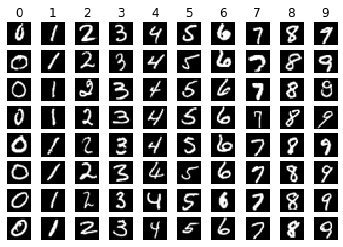

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

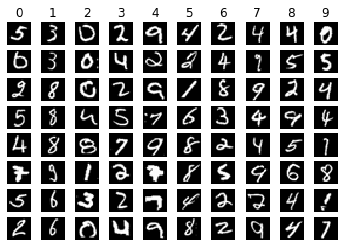

In [5]:
my_GaussianNB()

### Nearest Centroid Classifier (NCC)

My implementation of the Nearest Centroid Classifier. Same result as `sklearn.neighbors.NearestCentroid`.

In [6]:
class NearestCentroidClassify():
    """
    Implementation of Nearest Centroid Classifyer
    """        
    def fit(self, X, y):
        
        (n_observations, n_features) = np.shape(X)
        classes = np.unique(y)
        n_classes = len(classes)
        
        self.centroids = np.empty((n_classes, n_features), dtype=np.float64)
        
        for current_class in classes:
            
            self.centroids[current_class] = X[y == current_class].mean(axis=0)
        return self
    
    def predict(self, X):
        
        preds = np.empty(len(X), dtype = np.int32)
        
        for i, x in enumerate(X):
            #predicts the class for which the euclidean distance (l2 norm) is lowest among the centroids
            preds[i] = np.argmin([np.linalg.norm(x - centroid, 2)for centroid in self.centroids])
        
        self.preds = preds
        return self.preds

Function `my_NCC` written in the same way as code in lab instructions.

In [7]:
def my_NCC():
    mnist = MNISTData('Handout_NaiveBayes/MNIST_Light/*/*.png')


    train_features, test_features, train_labels, test_labels = mnist.get_data()

    mnist.visualize_random()
    
    ncc = NearestCentroidClassify()
    ncc.fit(train_features, train_labels)
    y_pred = ncc.predict(test_features)

    print("Classification report NearestCentroidClassify:\n%s\n"
      % (metrics.classification_report(test_labels, y_pred)))
    print("Confusion matrix NearestCentroidClassify:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

    mnist.visualize_wrong_class(y_pred, 8)

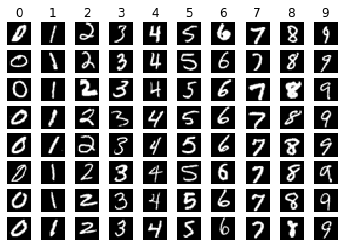

Classification report NearestCentroidClassify:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       164
           1       0.71      0.97      0.82       152
           2       0.84      0.73      0.78       155
           3       0.74      0.76      0.75       154
           4       0.75      0.76      0.75       143
           5       0.72      0.69      0.70       141
           6       0.90      0.86      0.88       143
           7       0.95      0.80      0.87       158
           8       0.79      0.72      0.75       132
           9       0.76      0.80      0.78       158

    accuracy                           0.80      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.80      0.80      1500


Confusion matrix NearestCentroidClassify:
[[150   0   2   0   0   6   3   1   2   0]
 [  0 148   0   0   0   2   0   0   2   0]
 [  0  15 113   8   2   3   3   1   8   2]
 [  1   5   8 117   1 

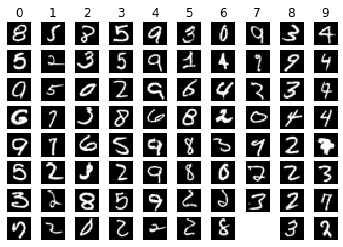

In [8]:
my_NCC()

### Naive Bayesian Classifier (NBC)

Load the data set.

In [9]:
from sklearn.datasets import load_digits
from itertools import product

Implementation of `NaiveBayesianClassifier` https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html.

In [10]:
class NaiveBayesianClassifier():
        
    
    def fit(self, X, y):
        
        self.classes, counts = np.unique(y, return_counts=True)
        n_obs, n_rows, n_cols = np.shape(X)
        pixel_values = np.unique(X.flatten())
        cond_prob = {}

        for current_class in self.classes:
            class_pixel = {}
            X_current_class = X[y == current_class]
            
            for k, (i,j) in enumerate(product(range(n_rows), range(n_cols))):
                
                pixel_val_counts = np.zeros(len(pixel_values))
                #Get unique the number of unique values and their position
                pos, n_uniques = np.unique(X[y == current_class][:,i,j], return_counts=True)
                #Set the number number of unique values at corresponding position
                pixel_val_counts[pos.astype(np.int8)] = n_uniques
                #Normalize to be probabilities using add-one or Laplace smoothing
                class_pixel[k] = (pixel_val_counts + 1) / np.sum(pixel_val_counts + 1)
                
            cond_prob[current_class] = class_pixel
            
        self.cond_prob = cond_prob
        self.priors = counts / np.sum(counts)
    
    def predict(self, X):
        
        preds = np.zeros(len(X), dtype = np.int32)
        n_obs, n_rows, n_cols = np.shape(X)
        
        for n, x in enumerate(X):
            probs = np.zeros(len(self.classes))
            for current_class in self.classes:
                prob = self.priors[current_class]
                for k, (i,j) in enumerate(product(range(n_rows), range(n_cols))):
                    #Take the conditional probability at of having pixelvalue x[i,j] 
                    #at the (i,j):th = n:th pixel for current class
                    prob += np.log(self.cond_prob[current_class][k][int(x[i,j])])
                
                probs[current_class] = prob

            preds[n] = np.argmax(probs)
    
        self.preds = preds
        return self.preds

In [11]:
def my_NBC_digits():    
    digits = load_digits()

    train_features, test_features, train_labels, test_labels = train_test_split(digits.images, digits.target,
                                                                            test_size=0.3, random_state=42)
    nbc = NaiveBayesianClassifier()
    nbc.fit(train_features, train_labels)
    y_pred = nbc.predict(test_features)

    print("Classification report NaiveBayesianClassifier:\n%s\n"
      % (metrics.classification_report(test_labels, y_pred)))
    print("Confusion matrix NaiveBayesianClassifier:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

In [12]:
my_NBC_digits()

Classification report NaiveBayesianClassifier:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.86      0.84      0.85        50
           2       0.90      0.94      0.92        47
           3       0.94      0.91      0.92        54
           4       0.93      0.95      0.94        60
           5       0.93      0.76      0.83        66
           6       0.96      0.98      0.97        53
           7       0.90      0.98      0.94        55
           8       0.86      0.88      0.87        43
           9       0.77      0.85      0.81        59

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.90      0.90      0.90       540


Confusion matrix NaiveBayesianClassifier:
[[51  0  0  0  1  0  1  0  0  0]
 [ 0 42  5  0  0  1  0  0  0  2]
 [ 0  0 44  0  0  0  0  0  3  0]
 [ 0  1  0 49  0  0  0  1  1  2]
 [ 0  1  0  0 57  0

In [23]:
def my_NBC_mnist():    
    mnist = MNISTData('Handout_NaiveBayes/MNIST_Light/*/*.png')


    train_features, test_features, train_labels, test_labels = mnist.get_data()
    
    nbc = NaiveBayesianClassifier()
    nbc.fit(train_features.reshape([-1, 20,20]), train_labels)
    y_pred = nbc.predict(test_features.reshape([-1, 20,20]))

    print("Classification report NaiveBayesianClassifier:\n%s\n"
      % (metrics.classification_report(test_labels, y_pred)))
    print("Confusion matrix NaiveBayesianClassifier:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

In [24]:
my_NBC_mnist()

Classification report NaiveBayesianClassifier:
              precision    recall  f1-score   support

           0       0.11      1.00      0.20       164
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       155
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       143
           5       0.00      0.00      0.00       141
           6       0.00      0.00      0.00       143
           7       0.00      0.00      0.00       158
           8       0.00      0.00      0.00       132
           9       0.00      0.00      0.00       158

    accuracy                           0.11      1500
   macro avg       0.01      0.10      0.02      1500
weighted avg       0.01      0.11      0.02      1500


Confusion matrix NaiveBayesianClassifier:
[[164   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [155   0   0   0   0   0   0   0   0   0]
 [154   0   0   0   0 

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Gaussian Naive Bayesian Classifier (GNB) 

In [ ]:
class GaussianNaiveBayesianClassifier():
    
    
    def log_gaussian(self, x, mu, sigma):
        """
        Returns Gaussian and 0 if mu or sigma is 0 
        """
        if any(np.isclose([sigma, mu], 0)):
            return np.zeros(1)
        else:
            #return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))
            return (-(x - mu)**2 / (2 * sigma**2))
        
    
    def fit(self, X, y):
        
        self.classes = np.unique(y)
        
        means = {}
        stds = {}

        for current_class in self.classes:
            means[current_class] = np.mean(X[y == current_class], axis=0)
            stds[current_class]  = np.std(X[y == current_class], axis=0)
            
        self.means = means
        self.stds = stds
    
    def predict(self, X):
        
        preds = np.empty(len(X), dtype = np.int32)
        log_gaussian = np.vectorize(self.log_gaussian)
        
        for i, x in enumerate(X):
            probs = np.zeros(len(self.classes))
            for current_class in self.classes:
                prob = log_gaussian(x, self.means[current_class], self.stds[current_class])
                probs[current_class] = np.sum(prob)
                
            preds[i] = np.argmax(probs)
            
        self.preds = preds
        return self.preds

In [ ]:
def my_GNBC_digits():    
    digits = load_digits()

    train_features, test_features, train_labels, test_labels = train_test_split(digits.images, digits.target,
                                                                            test_size=0.3, random_state=42)
    gnbc = GaussianNaiveBayesianClassifier() 
    gnbc.fit(train_features, train_labels)
    y_pred = gnbc.predict(test_features)

    print("Classification report GaussianNaiveBayesianClassifier:\n%s\n"
      % (metrics.classification_report(test_labels, y_pred)))
    print("Confusion matrix GaussianNaiveBayesianClassifier:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

In [ ]:
gnbc = GaussianNaiveBayesianClassifier() 

In [ ]:
my_GNBC_digits()

In [ ]:
def my_NBC_mnist():
    mnist = MNISTData('Handout_NaiveBayes/MNIST_Light/*/*.png')


    train_features, test_features, train_labels, test_labels = mnist.get_data()

    mnist.visualize_random()
    
    nbc = NaiveBayesianClassifier()
    nbc.fit(train_features, train_labels)
    y_pred = nbc.predict(test_features)

    print("Classification report GaussianNaiveBayesianClassifier:\n%s\n"
      % (metrics.classification_report(test_labels, y_pred)))
    print("Confusion matrix GaussianNaiveBayesianClassifier:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

    mnist.visualize_wrong_class(y_pred, 8)

In [ ]:
#Takes long time
run_NBC_mist = False
if run_NBC_mist: my_NBC_mnist()